In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ref - https://www.kaggle.com/rodolfomendes/abalone-dataset

In [119]:
# import data
df = pd.read_csv("abalone.csv", names = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings'])
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [120]:
df.shape

(4177, 9)

The target variable in this dataset is the `age` of Abalones. From source - 
> The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

To calculate age of Abalones, the following relationship is used - 
$Age = n(Rings) + 1.5$

We will now create `age` feature and drop `rings` feature.

In [121]:
# creating age variable
df['age'] = df['rings'] + 1.5
df.drop('rings', axis = 1, inplace=True)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [122]:
df['age'].describe()

count    4177.000000
mean       11.433684
std         3.224169
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

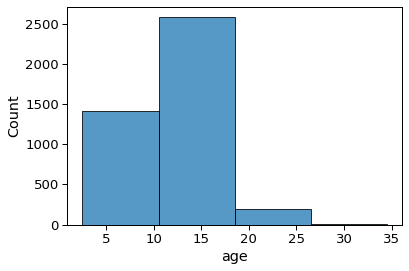

In [123]:
sns.histplot(df['age'], binwidth=8)

To treat this as a classification problem, we will convert age into categorical variable using `age_class` with below conditions -  
- Category 0 - `Age < 11`
- Category 1 - `Age >= 11`

In [124]:
def age_classify(x):
    if x < 11:
        return 0
    else:
        return 1

In [125]:
df['age_class'] = df['age'].map(age_classify)
df.head(20)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age,age_class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5,0
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5,1
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5,1
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5,0
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5,1


<AxesSubplot:xlabel='age_class', ylabel='count'>

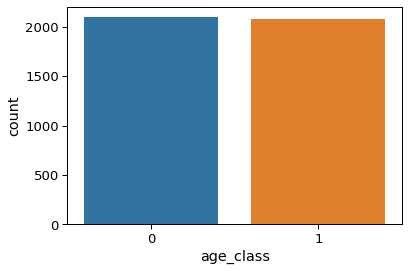

In [126]:
sns.countplot(df['age_class'])

In [127]:
# drop age
df.drop('age', axis = 1, inplace=True)

# EDA

In [128]:
# drop duplicates, if any
df.drop_duplicates(inplace=True)
df.shape

(4177, 9)

In [129]:
# summary stats
df.describe(include = 'all')

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age_class
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,0.498204
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.500057
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,0.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,1.000000


In [130]:
df[df['height'] == 0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age_class
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,0
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,0


- 2 records show `height` has value = 0 which should not be possible. This is probably an error or a missed measurement. We will drop those records. 

In [131]:
df = df[df.height != 0]
df.shape

(4175, 9)

In [132]:
# check na
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
age_class         0
dtype: int64

<AxesSubplot:>

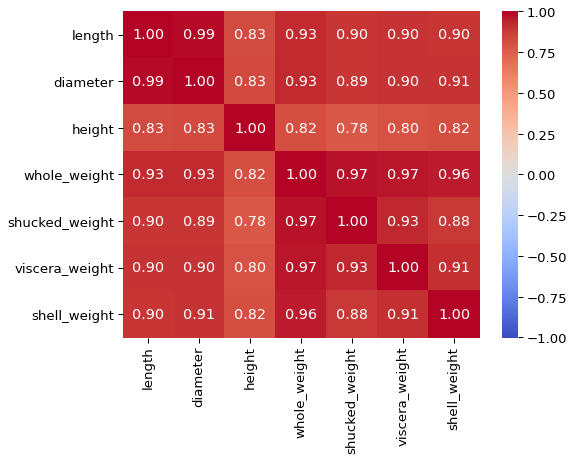

In [133]:
# check for multicollinearity
# correlation plot
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

df_corr = df.iloc[:, :-1].corr()

sns.heatmap(df_corr, annot=True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt='.2f')

- Almost all of the features have some correlation with each other, which is understandable given that the data is for a living species whose features are all directly correlated with each other.
- We will still drop variables that are highly correlated i.e. r > 0.95.

In [134]:
# finding correlations
## extract variable pairs having |correlation| > 0.9
corr_var = []
for c in df_corr.columns:
    for r in df_corr.index:
        if ((df_corr.loc[c, r] >= 0.9) | (df_corr.loc[c, r] <= -0.9)) & (c != r):
            corr_var.append(list([c, r]))
            
## sort and remove duplicate pairs
for i in range(len(corr_var)):
    corr_var[i].sort()
    
temp = []
for e in corr_var:
    if e not in temp:
        temp.append(e)

corr_var = temp
del(temp) # removing unnecessary variable

## extracting data for dataframe
corr_var_1, corr_var_2, corr_val = [], [], []
for e in corr_var:
    corr_var_1.append(e[0])
    corr_var_2.append(e[1])
    corr_val.append(round(df_corr.loc[e[0], e[1]], 2))

## Cumulative correlation
rcum_1, rcum_2 = [], []
for e in corr_var_1:
    rcum_1.append(round((df_corr[e].sum() - 1), 2))
    
for e in corr_var_2:
    rcum_2.append(round((df_corr[e].sum() - 1), 2))

# creating dataframe
correlations = pd.DataFrame({'r': corr_val, 'Var_1': corr_var_1, 'rcum_Var_1':rcum_1, 'Var_2':corr_var_2, 'rcum_Var_2':rcum_2})
correlations['Var_to_Remove'] = np.where((correlations['rcum_Var_1']) > (correlations['rcum_Var_2']), 
                                         correlations['Var_1'], correlations['Var_2'])
correlations


,r,Var_1,rcum_Var_1,Var_2,rcum_Var_2,Var_to_Remove
0,0.99,diameter,5.45,length,5.44,diameter
1,0.93,length,5.44,whole_weight,5.56,whole_weight
2,0.90,length,5.44,viscera_weight,5.41,length
3,0.93,diameter,5.45,whole_weight,5.56,whole_weight
4,0.91,diameter,5.45,shell_weight,5.37,diameter
5,0.97,shucked_weight,5.35,whole_weight,5.56,whole_weight
6,0.97,viscera_weight,5.41,whole_weight,5.56,whole_weight
7,0.96,shell_weight,5.37,whole_weight,5.56,whole_weight
8,0.93,shucked_weight,5.35,viscera_weight,5.41,viscera_weight
9,0.91,shell_weight,5.37,viscera_weight,5.41,viscera_weight


In [135]:
# variables to drop
correlations.Var_to_Remove.unique()

array(['diameter', 'whole_weight', 'length', 'viscera_weight'],
      dtype=object)

In [136]:
# dropping correlated variables
df.drop(list(correlations.Var_to_Remove.unique()), axis = 1, inplace=True)
df.head()

,sex,height,shucked_weight,shell_weight,age_class
0,M,0.095,0.2245,0.150,1
1,M,0.090,0.0995,0.070,0
2,F,0.135,0.2565,0.210,0
3,M,0.125,0.2155,0.155,1
4,I,0.080,0.0895,0.055,0


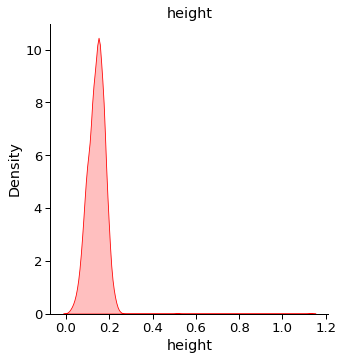

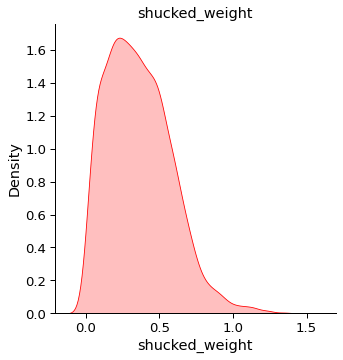

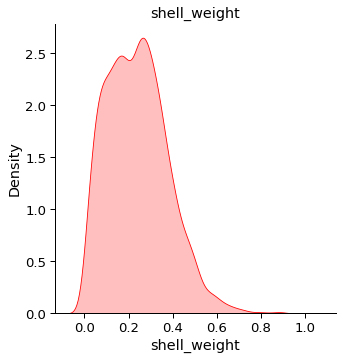

In [137]:
# checking dsitributions
for e in df.columns[1:-1]:
    sns.displot(df[e], kind = 'kde', color='red', fill = True)
    plt.title(e)

Let's check `height` since it has a very narrow distribution

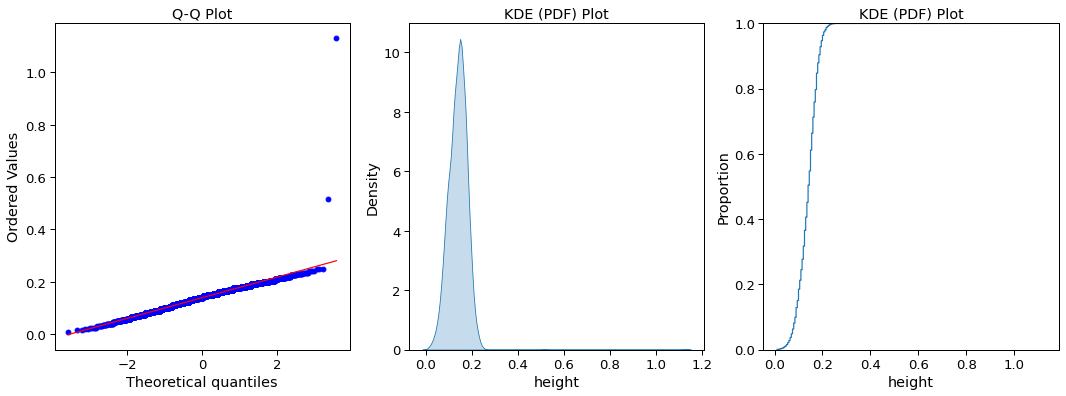

In [138]:
# function to check normality
# pdf, cdf and qq plot
def prob_plots(x):
    from scipy.stats import probplot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))

    res = probplot(x, plot = ax[0])
    ax[0].set_title("Q-Q Plot")

    ax[1] = sns.kdeplot(x, fill = True, ax = ax[1])
    ax[1].set_title("KDE (PDF) Plot")

    ax[2] = sns.ecdfplot(x, ax = ax[2])
    ax[2].set_title("KDE (PDF) Plot")

# checking height
prob_plots(df['height'])

`height` has two outliers which, if fixed, can make the distribution normal

In [139]:
# fixing outliers for height
# function to get outliers and fix them
def outlier_fix(x):
    import numpy as np
    import pandas as pd
    
    # we will use values > 1.5(IQR) as outliers and equate them to the 90th/10th percentile values 
    
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    iqr_upper_bound = 1.5*iqr + np.percentile(x, 75)
    iqr_lower_bound = np.percentile(x, 25) - 1.5*iqr
    upper_replacement = np.percentile(x, 90)
    lower_replacement = np.percentile(x, 10)
    print("IQR =", iqr)
    print("Upper, Lower Bound for Outliers =", iqr_upper_bound, ",", iqr_lower_bound)
    print("Values to replace outliers with =", upper_replacement, ",", lower_replacement)
    print("Number of Outliers =", len(x[(x > iqr_upper_bound) | (x < iqr_lower_bound)]))
    
    return iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement

outlier_fix(df['height'])

IQR = 0.05
Upper, Lower Bound for Outliers = 0.24000000000000002 , 0.039999999999999994
Values to replace outliers with = 0.185 , 0.09
Number of Outliers = 27


(0.05, 0.24000000000000002, 0.039999999999999994, 0.185, 0.09)

In [140]:
# we will equate outliers to upper limit (0.9 IQR)
df.loc[(df['height'] > 0.25), 'height'] = 0.24

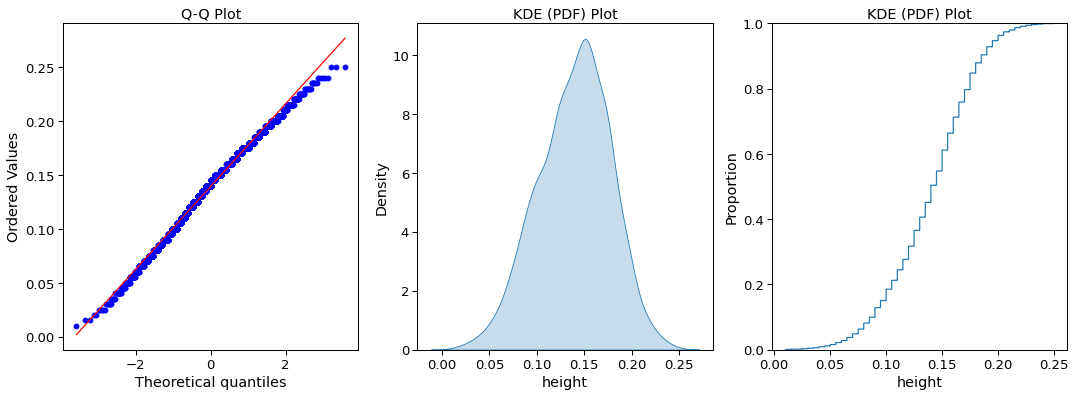

In [141]:
prob_plots(df['height'])

## Outliers in Remaining Features

In [142]:
# fixing outliers for height
# function to check for outliers
def outlier_fix(x):
    import numpy as np
    import pandas as pd
    
    # we will use values > 1.5(IQR) as outliers and equate them to the 90th/10th percentile values 
    
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    iqr_upper_bound = 1.5*iqr + np.percentile(x, 75)
    iqr_lower_bound = np.percentile(x, 25) - 1.5*iqr
    upper_replacement = np.percentile(x, 90)
    lower_replacement = np.percentile(x, 10)
    print("IQR =", format(iqr, '.3'))
    print("Upper, Lower Bound for Outliers =", format(iqr_upper_bound, '.3'), ",", format(iqr_lower_bound, '.3'))
    print("Values to replace outliers with =", format(upper_replacement, '.3'), ",", format(lower_replacement, '.3'))
#     print("Ratio of Outliers =", format(len(x[(x > iqr_upper_bound) | (x < iqr_lower_bound)])/len(x), '.2f'))
    print("Number of Outliers =", len(x[(x > iqr_upper_bound) | (x < iqr_lower_bound)]))
    
    return iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement

for e in df.columns[1:]:
    print(e)
    outlier_fix(df[e])
    print()

height
IQR = 0.05
Upper, Lower Bound for Outliers = 0.24 , 0.04
Values to replace outliers with = 0.185 , 0.09
Number of Outliers = 25

shucked_weight
IQR = 0.316
Upper, Lower Bound for Outliers = 0.976 , -0.287
Values to replace outliers with = 0.647 , 0.0865
Number of Outliers = 48

shell_weight
IQR = 0.199
Upper, Lower Bound for Outliers = 0.627 , -0.168
Values to replace outliers with = 0.42 , 0.065
Number of Outliers = 35

age_class
IQR = 1.0
Upper, Lower Bound for Outliers = 2.5 , -1.5
Values to replace outliers with = 1.0 , 0.0
Number of Outliers = 0



Too many values still outside the `1.5xIQR` range so we will leave them as is.

<AxesSubplot:xlabel='sex', ylabel='count'>

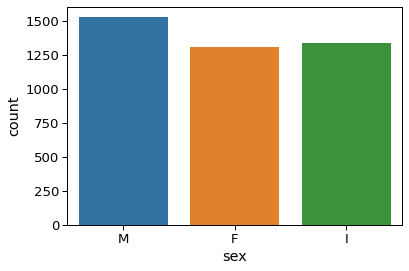

In [143]:
# check dependent variable distribution
sns.countplot(df['sex'])

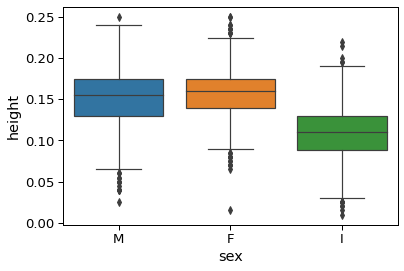

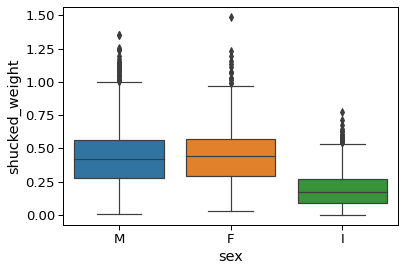

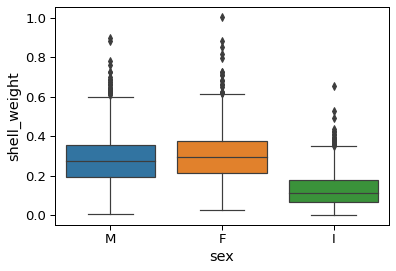

In [144]:
# compare dependent variable's categories
for e in df.columns[1:-1]:
    sns.boxplot(x = df['sex'], y = df[e])
    plt.show()

- All the categories are fairly equally distriburted. 
- All the parameters are low for `Infants` which is as expected.

# Model Building

In [145]:
# encode dummies for sex
df = pd.get_dummies(df, drop_first=True)
df.head()

,height,shucked_weight,shell_weight,age_class,sex_I,sex_M
0,0.095,0.2245,0.150,1,0,1
1,0.090,0.0995,0.070,0,0,1
2,0.135,0.2565,0.210,0,0,0
3,0.125,0.2155,0.155,1,0,1
4,0.080,0.0895,0.055,0,1,0


In [146]:
# import libraries
import statsmodels.api as sm

In [147]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop('age_class', axis = 1)
y = df['age_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# add constants to X_train, X_test
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (3340, 6)
X_test = (835, 6)
y_train = (3340,)
y_test = (835,)


## 1. Logistic Regression

In [148]:
from statsmodels.api import MNLogit

logistic_regressor = MNLogit(y_train, X_train).fit()
logistic_regressor.summary()

Optimization terminated successfully.
         Current function value: 0.451533
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              age_class   No. Observations:                 3340
Model:                        MNLogit   Df Residuals:                     3334
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.3486
Time:                        12:29:31   Log-Likelihood:                -1508.1
converged:                       True   LL-Null:                       -2315.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
   age_class=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.7758      0.305    -12.393      0.000      -4.373      -3.179
height            15.4284      3.052      5.055      0.000       9.447      21.410
shucked_weight    -7.1630      0.531    -13.493      0.000      -8.204      -6.123
shell_weight      18.9386      1.230     15.392      0.000      16.527      21.350
sex_I             -0.8297      0.125     -6.652      0.000      -1.074      -0.585
sex_M              0.0662      0.106      0.626      0.531      -0.141       0.273
==================================================================================
"""

### Model Summary Statistics -

1. Model has a **Pseudo R-Squared of ~0.35** which is low. But, we will know more once we have the full picture with confusion matrix.
2. **Log-Likelihood** - Also known as LL(Fit) it is an indication of how good the model fits and is usually used to compare with other models. But, it should be as low as possible compared to LL-Null (Log Likelihood of model with only intercept considered). 
3. **LLR p-value** - This is significant indicating that the model represented by LL(Fit) is significantly better than LL(Null) or LL(Observed).

## 2. Regularized Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

cv_parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                 'C' : np.reciprocal([1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]),
                 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

logistic_regressor = GridSearchCV(estimator=LogisticRegression(), 
                                  param_grid=cv_parameters,
                                  cv = 5,
                                  scoring = 'accuracy',
                                  return_train_score = 'True')
logistic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+15, 1.00000000e+10, 1.00000000e+08, 1.00000000e+03,
       1.00000000e+02, 1.00000000e+00, 2.00000000e-01, 1.00000000e-01,
       5.00000000e-02, 3.33333333e-02, 2.85714286e-02, 2.50000000e-02,
       2.22222222e-02, 2.00000000e-02, 1.81818182e-02, 1.00000000e-02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score='True', scoring='accuracy')

In [177]:
logistic_regressor.best_score_

0.778443113772455

In [185]:
cv_results = pd.DataFrame(logistic_regressor.cv_results_).dropna()
cv_results = cv_results.iloc[:, [4,5,6,13,21,14,22]]
# lasso_cv_results.iloc[lasso_regressor.best_index_, :]  # for best index
# list(enumerate(lasso_cv_results.columns))
cv_results.sort_values(by = 'mean_test_score', ascending = False).head()

,param_C,param_penalty,param_solver,mean_test_score,mean_train_score,std_test_score,std_train_score
89,100,l2,saga,0.778443,0.779491,0.017121,0.003956
88,100,l2,sag,0.778443,0.779641,0.016963,0.003949
87,100,l2,liblinear,0.778443,0.779641,0.016963,0.003949
86,100,l2,lbfgs,0.778443,0.779641,0.016963,0.003949
85,100,l2,newton-cg,0.778443,0.779641,0.016963,0.003949


## Model Performance Parameters - Confusion Matrix

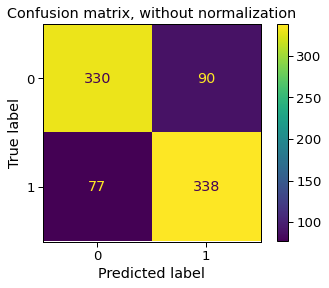

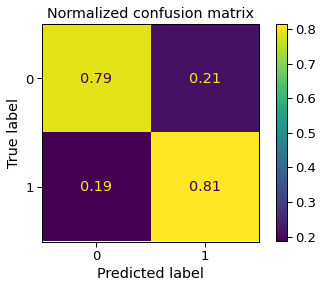

In [208]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(y_true = y_test, y_pred = logistic_regressor.predict(X_test), labels = [0, 1])
# cm_norm = confusion_matrix(y_true = y_test, y_pred = logistic_regressor.predict(X_test), labels = [0, 1], normalize=True)
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    cm = confusion_matrix(y_true = y_test, y_pred = logistic_regressor.predict(X_test), labels = [0, 1], normalize = normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regressor.classes_)
    disp.plot()
    plt.title(title)
    plt.show()

## Final Predictions